# 1. Table of contents<a class ="anchor" id="0.Contents"></a>

* [1. Table of contents](#0.Contents)
    * [1.1. Introduction](#Intro)
* [2. Import Dependent Libraries](#1.Import)
* [3. Importing 311 Service Requests Data](#2.Import_data)
    * [3.1. Import data from Socrata Open Data API (Soda)](#2.1.Import_data1)
    * [3.2. Google-colab authorization and importing data from Google Drive](#2.2.Import_data2)
    * [3.3. Importing JSON objects using API and flattening ](#2.3.Import_data3)
    * [3.4. Importing data from a csv file in a local directory](#2.4.Import_data4)
* [4. Plot to check for missing values](#3.missing_values)
    * [comments](#comment1)
* [5. 2017 Reporting](#4.2017_Reporting)
    * [5.1. Analysis-1](#4.1.Q1)
        * [5.1.2. Plot of top 10 complaints in NYC in 2017](#4.1.2.Fig1)
        * [5.1.4.  Plot of top 10 complaint types by each borough in 2017](#4.1.4.Fig2)
            * [comments](#comment2)
    * [5.2. Analysis-2](#4.2.Q2)
        * [4.2.6. Plot of Complaint-index (total complaints relative to their population) for each Borough in 2017](#4.2.6.Fig3)
            * [comments](#comment3)
    * [5.3. Analysis-3](#4.3.Q3)
        * [5.3.4. Plot of Complaint-index (total complaints relative to their population) of the two complaint types for each Borough in NYC in 2017'](#4.3.4.Fig4)
            * [comments](#comment4)
* [6. Time Series/Exploratory Analysis](#5.TS)
    * [6.1. Analysis-4](#5.1.Q1)
        * [6.1.5. Monthly plot of complaint-rates by each Borough between 2010 and 2021](#5.1.5.Fig5)
        * [6.1.7. Monthly plot of complaint-rates for NYC between 2010 and 2021](#5.1.7.Fig6)
            * [comments](#comment5)
    * [6.2. Analysis-5](#5.2.Q2)
        * [6.2.2. Scatter plot of Complaint rate vs Complaint Index to look for anomalies/outliers](#5.2.2.Fig6)
            * [comments](#comment6)
        * [6.2.3. Zip codes with highest complaint rates before and after winsorization](#5.2.3.Tab1)
            * [comments](#comment7)
* [7. Animation of complaints in NYC by each month in 2021](#animation)

# 1.1. Introduction<a class="anchor" id="Intro"></a>

The objective of this project is to analyze recent data on NYC 311 calls and develop a neural network capable of classifying the agency that responded to each call. By examining the content, timing, frequency, and location of the issues raised by 311 callers, government agencies and local policy stakeholders can better serve NYC residents. Through exploratory analysis and visualization of public 311 data, this project aims to contribute to this understanding. The modeling section focuses on demonstrating a proof-of-concept tool that efficiently connects residents to the appropriate government services.\

In this analysis, I analyze the 311 service request data for New York city between the years 2010 and 2021. \
The dataset has 25,839,156 rows and 47 columns.

# 2. Import Dependent Libraries<a class="anchor" id="1.Import_libraries"></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns 
import warnings

from matplotlib import style
from google.colab import drive
warnings.filterwarnings("ignore")

# 3. Importing 311 Service Requests Data <a class="anchor" id="2.Import_data"></a>
Note: Data source details are in the README.md file. \
Data imports can be done in either of the below 4 methods

#### 3.1. Import data from Socrata Open Data API (Soda)  <a class="anchor" id="2.1.Import_data1"></a>

In [ ]:
from sodapy import Socrata #install sodapy from pip and then import dataset

client = Socrata("data.cityofnewyork.us", None)
client.timeout = 1000
results = client.get("erm2-nwe9", limit=1500000)

In [ ]:
df = pd.DataFrame.from_records(results)
df.head()

#### 3.2. Google-colab authorization and importing data from Google Drive <a class="anchor" id="2.2.Import_data2"></a>

```python
from pydrive.auth import GoogleAuth #!pip install -U -q PyDrive
from pydrive.drive import GoogleDrive
from google.colab import auth #!pip install google-colab
from oauth2client.client import GoogleCredentials

#to import files from google drive
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/311_Service_Requests_from_2010_to_Present.csv')

#authorization-not required if done manually
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
```

#### 3.3. Importing JSON objects using API and flattening <a class="anchor" id="2.3.Import_data3"></a>
#### --Only imports first 1000 obs--

```python
import requests
import json
Data_API = requests.get('https://data.cityofnewyork.us/resource/erm2-nwe9.json')
Data = Data_API.text
parse_json=json.loads(Data) #parses the json objects
df = json_normalize(parse_json) #flatterns the json object to form a dataframe
```

#### 3.4. Importing data from a csv file in a local directory<a class="anchor" id="2.4.Import_data4"></a>

In [7]:
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
#print(df.columns) #prints column names

#include only essential columns
df = df[['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor', 'Borough',
         'Incident Zip','Latitude', 'Longitude', 'Location']]


Borough_list=['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']
df=df[df['Borough'].isin(Borough_list)] #drops observations of boroughs not in the above list
df=pd.read_csv('df.csv')
print(df.shape) #dimensions of the dataframe
print(df.info()) #gives basic characteristics of the dataset
#df.describe().loc[['mean','std', 'min', 'max']] #summary statistics

(25839156, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25839156 entries, 0 to 25839155
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unique Key      int64  
 1   Created Date    object 
 2   Closed Date     object 
 3   Agency          object 
 4   Complaint Type  object 
 5   Descriptor      object 
 6   Borough         object 
 7   Incident Zip    object 
 8   Latitude        float64
 9   Longitude       float64
 10  Location        object 
 11  Year_month      object 
 12  Year            int64  
 13  Month           int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 2.7+ GB
None


# 4. Plot to check for missing values<a class="anchor" id="3.missing_values"></a>

####      --yellow color in the below plot represents missing values--

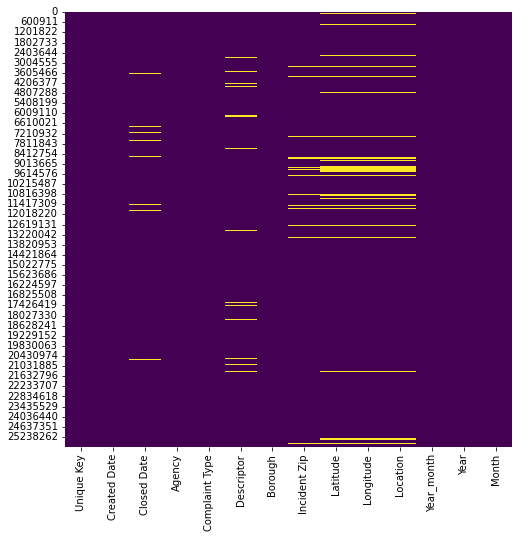

In [15]:
plt.figure(figsize=(8, 8))      #figsize in inches
sns.heatmap(df.isnull(),xticklabels=True,cbar=False,cmap='viridis') #heat map of missing data
plt.show()

<a class="anchor" id="comment1"></a> From the above plot, it seems like there are not many missing observations in the key variables about to be used in this analysis. But I will deal with them later in the analysis.

# 5. 2017 Reporting<a class="anchor" id="4.2017_Reporting"></a>

### <a class="anchor" id="4.1.Q1"></a> 5.1. Analysis-1: 
### Consider only the 10 most common overall complaint types. For each borough, how many of each of those 10 types were there in 2017?

#### <a class="anchor" id="4.1.1"></a> 5.1.1. Create year-month, year and month variables

In [32]:
df['Year_month'] = pd.DatetimeIndex(df['Created Date']).strftime('%Y-%m')
df['Year'] = pd.DatetimeIndex(df['Created Date']).year #creates year variable
df['Month'] = pd.DatetimeIndex(df['Created Date']).month #creates month variable
df.to_csv('df.csv', index=False) #saves the above file in csv format
#type(data)#### 
#df['Year'].value_counts() #num of observations by each year
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Borough,Incident Zip,Latitude,Longitude,Location,Year_month,Year,Month
0,21739884,10/26/2011 07:31:00 PM,12/23/2011 12:00:00 PM,DSNY,Dirty Conditions,E12 Illegal Dumping Surveillance,BRONX,10458,40.855093,-73.884935,"(40.85509340131799, -73.88493530762781)",2011-10,2011,10
1,21738939,10/26/2011 10:31:00 AM,10/26/2011 01:10:00 PM,DEP,Sewer,Sewer Backup (Use Comments) (SA),QUEENS,11102,40.771719,-73.924194,"(40.77171927047292, -73.92419376703837)",2011-10,2011,10
2,21738160,10/26/2011 12:00:00 AM,11/10/2011 12:00:00 AM,HPD,PLUMBING,WATER-LEAKS,BROOKLYN,11225,40.660516,-73.944292,"(40.660515782814635, -73.9442916673507)",2011-10,2011,10
3,21738643,10/26/2011 12:00:00 AM,10/26/2011 12:00:00 AM,HPD,HEATING,HEAT,BROOKLYN,11236,40.631104,-73.907929,"(40.631104004393514, -73.90792864374247)",2011-10,2011,10
4,21739724,10/26/2011 12:00:00 AM,10/31/2011 12:00:00 AM,HPD,HEATING,HEAT,BRONX,10456,40.824868,-73.908380,"(40.824867693955554, -73.90837957440094)",2011-10,2011,10


#### <a class="anchor" id="4.1.2.Fig1"></a>5.1.2. Plot of top 10 complaints in NYC in 2017 

In [16]:
df_2017=df[df['Year']==2017] #subset the original dataset to a new one with only year 2017 obs 
df_2017.shape
df_2017.to_csv('df_2017.csv', index=False) #saves the above file in csv format

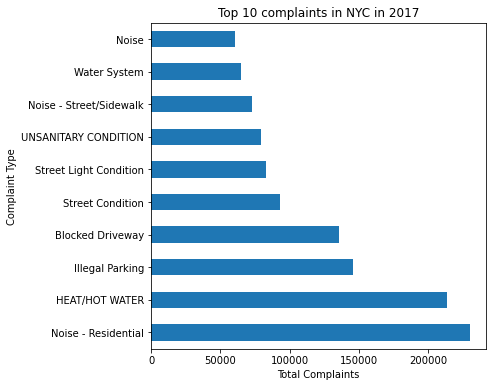

In [20]:
top_complaints=df_2017['Complaint Type'].value_counts()[:10].index.tolist() #list with names of the top 10 complaints

#plot for the top complaints in 2017
plt.figure(figsize=(6,6))      #figsize in inches
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df_2017['Complaint Type'].value_counts()[:10].plot(kind='barh') #plot function that plots frequency
plt.xlabel('Total Complaints')
plt.ylabel('Complaint Type')
plt.title('Top 10 complaints in NYC in 2017')
plt.show()

#### 5.1.3. Number of complaints of the top 10 complaint types by each borough in 2017

In [21]:
#Filter the observations having complaint type from the top complaints list
df2_2017=df_2017[df_2017['Complaint Type'].isin(top_complaints)] 
df3_2017 = df2_2017.groupby(['Complaint Type','Borough']) #grouping by 2 columns -'Complaint Type','Borough'
df4_2017=df3_2017.size().unstack() #Borough_level_complaint_frequency
df4_2017.reset_index(inplace=False) #converts labels to column
df4_2017

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
Complaint Type,,,,,
Blocked Driveway,24615,49432,3434,54413,3795
HEAT/HOT WATER,68718,66984,46529,29217,2073
Illegal Parking,16148,55516,19750,46169,8069
Noise,3134,15421,29002,10684,1926
Noise - Residential,57704,67687,51078,46425,7038
Noise - Street/Sidewalk,14029,21328,29175,7532,868
Street Condition,11761,25432,14840,30637,10595
Street Light Condition,18410,22458,11077,24258,6604
UNSANITARY CONDITION,24561,26659,14635,11474,1953


#### <a class="anchor" id="4.1.4.Fig2"></a>5.1.4.  plot of top 10 complaint types by each borough in 2017

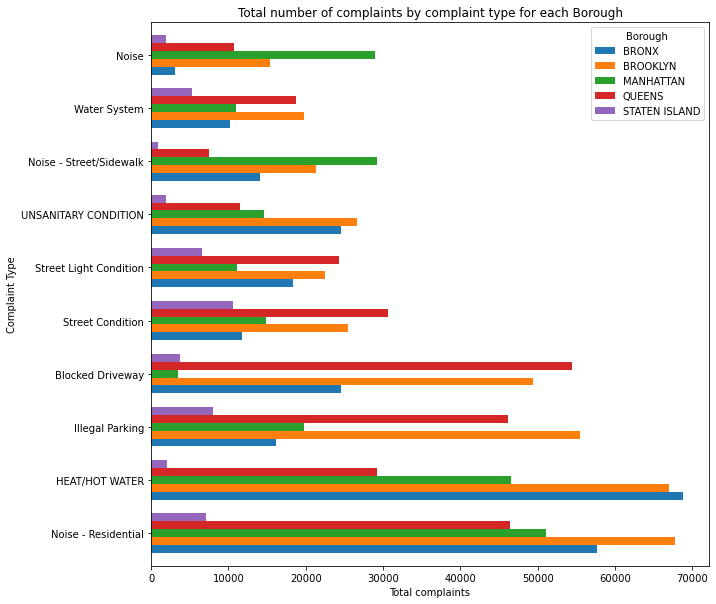

In [22]:
(df4_2017.reindex(index=df4_2017.mean(axis=1)
    .sort_values(ascending=False)
    .index).plot(kind='barh', figsize=(10, 10), width=0.75,
                 title='Total number of complaints by complaint type for each Borough'))
plt.xlabel('Total complaints')
plt.show()

<a class="anchor" id="comment2"></a> 
From the above two plots, it is evident that the highest complaint type in 2017 across each borough and NYC as a whole is Noise - Residential, followed by Heat/Hot water, Illegal parking, and the others.

### <a class="anchor" id="4.2.Q2"></a>5.2. Analysis-2: 
### Considering all complaint types. Which boroughs are the biggest "complainers" relative to the size of the population in 2017? Meaning, calculate a complaint-index that adjusts for population of the borough.

#### 5.2.1. Import population data and convert the keys used for merging to the same data type

In [24]:
pop=pd.read_csv('2010_Census_Population_By_Zipcode.csv')
pop=pop.dropna() #delete rows with missing values
#drop rows with population=0, otherwise it creates complaint-index = infinity
pop.drop(pop[pop['2010 Census Population'] == 0].index, inplace = True) 
print(pop.shape)
#print(pop.columns) #column names
pop=pop.rename(columns={'Zip Code ZCTA': 'Incident Zip', '2010 Census Population': 'Population'}) #renaming columns
df_2017['Incident Zip']= pd.to_numeric(df_2017['Incident Zip'], errors='coerce') #convert string to numeric

(32948, 2)


#### 5.2.2. Form unique zipcode & borough combination table from the original 311 service request dataset

In [25]:
Borough_Zip=df_2017[['Borough','Incident Zip']].drop_duplicates()
Borough_Zip=Borough_Zip.dropna() #dropping rows with missing values
Borough_Zip.head()

,Borough,Incident Zip
1229,BRONX,10453.0
5083,BROOKLYN,11221.0
14658,QUEENS,11422.0
14782,QUEENS,11411.0
18059,BROOKLYN,11225.0


#### 5.2.3. Calculate total number of complaints by zip code

In [26]:
total_complaints_freq_all = df_2017['Incident Zip'].value_counts().tolist() #list with frequencies of the complaints
total_complaints_all = df_2017['Incident Zip'].value_counts().index.tolist() #list with index of zipcodes
total_complaints_freq_all =pd.DataFrame(total_complaints_freq_all, columns=['num_complaints'])
total_complaints_all =pd.DataFrame(total_complaints_all, columns=['Incident Zip'])
df5_2017 = pd.concat([total_complaints_all, total_complaints_freq_all], axis=1)
df5_2017.shape
#data2.head()

(265, 2)

#### 5.2.4. Merge population dataset with the above total number of complaints dataset using zip code as the key

In [27]:
df6_2017=df5_2017.merge(pop, on='Incident Zip', how='left') #Left join merge
print(pop.shape)
print(df6_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset
df6_2017.head()

(32948, 2)
(265, 3)


,Incident Zip,num_complaints,Population
0,11226.0,42462,101572.0
1,11385.0,35293,98592.0
2,10467.0,34257,97060.0
3,11207.0,31063,93386.0
4,10453.0,29844,78309.0


#### 5.2.5. Merging Borough Zip table with total number of complaints dataset to estimate complaint-index (total complaints relative to their population) for each borough of NYC

In [31]:
df7_2017=df6_2017.merge(Borough_Zip, on='Incident Zip', how='left') #Left join merge
df7_2017.head()
df7_2017=df7_2017.dropna() 

#aggregate the number of complaints and population for each borough
df8_2017=df7_2017.groupby(['Borough'])[['num_complaints','Population']].sum()

#complaint-index at borough-level
df8_2017['complaint_index']=df8_2017['num_complaints']/df8_2017['Population']
print(Borough_Zip.shape)
print(df8_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset
df8_2017.reset_index(inplace=True) #converts labels to column
df9_2017=df8_2017[['Borough','complaint_index']]
df9_2017.head()
#print(type(data6))
#print(data6.shape)

(297, 2)
(5, 3)


,Borough,complaint_index
0,BRONX,0.293921
1,BROOKLYN,0.300462
2,MANHATTAN,0.295520
3,QUEENS,0.251499
4,STATEN ISLAND,0.275267


#### <a class="anchor" id="4.2.6.Fig3"></a>5.2.6. Plot of Complaint-index (total complaints relative to their population) for each Borough in 2017

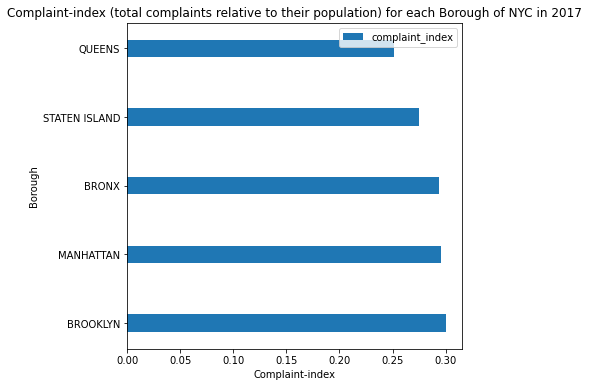

In [29]:
(df9_2017.reindex(index=df9_2017.mean(axis=1)
    .sort_values(ascending=False)
    .index).set_index('Borough').plot(kind='barh', figsize=(6,6), width=0.25)) #renaming bar plot index values
plt.ylabel('Borough')
plt.xlabel('Complaint-index')
plt.title("Complaint-index (total complaints relative to their population) for each Borough of NYC in 2017") 
plt.show()

<a class="anchor" id="comment3"></a> 
From the above plot, Brooklyn has the most number of complaints relative to the size of its population in 2017, followed by Manhattan, Bronx, Staten Island and Queens.

## 5.3. <a class="anchor" id="4.3.Q3"></a>Analysis-3: Run the Complaint index focusing on one or two complaint types you’re curious about.

#### Here, I will analyze two of the most frequent complaint types- 'Blocked Driveway' & 'Illegal Parking'

#### 5.3.1. Calculate total number of complaints by complaint type by zipcode

In [30]:
#list with frequencies of the complaints
ct_total_complaints_freq_all = df_2017[['Incident Zip','Complaint Type']].value_counts().tolist()
#list with index of zipcodes
ct_total_complaints_all = df_2017[['Incident Zip','Complaint Type']].value_counts().index.tolist() 

#convert these lists to dataframes
ct_total_complaints_freq_all =pd.DataFrame(ct_total_complaints_freq_all, columns=['num_complaints'])
ct_total_complaints_all =pd.DataFrame(ct_total_complaints_all, columns=['Incident Zip','Complaint Type'])
#column bind to form one dataset
df10_2017 = pd.concat([ct_total_complaints_all, ct_total_complaints_freq_all], axis=1) 

#include observations of the two compaint types of interest 
df11_2017=df10_2017[df10_2017['Complaint Type'].isin(['Blocked Driveway','Illegal Parking'])]
print(df11_2017.shape)
df11_2017.head()

(391, 3)


,Incident Zip,Complaint Type,num_complaints
14,11368.0,Blocked Driveway,4388
18,11385.0,Illegal Parking,4136
30,11209.0,Illegal Parking,3289
35,11214.0,Illegal Parking,3159
40,11223.0,Illegal Parking,3082


#### 5.3.2. Merge poulation dataset with the above total number of complaints dataset using zip code as key

In [32]:
df12_2017=df11_2017.merge(pop, on='Incident Zip', how='left') #Left join merge
print(pop.shape)
print(df12_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset

(32948, 2)
(391, 4)


#### 5.3.3. Merging Borough table with the total number of complaints dataset to estimate complaint-index (total complaints relative to their population) for each Borough in 2017

In [33]:
df13_2017=df12_2017.merge(Borough_Zip, on='Incident Zip', how='left') #Left join merge
df13_2017=df13_2017.dropna() 

#aggregating number of complaints and population by borough and complaint type
df14_2017=df13_2017.groupby(['Borough','Complaint Type'])[['num_complaints','Population']].sum()
#print(type(data5))

#complaint-index at borough-level for each complaint type
df14_2017['complaint_index']=df14_2017['num_complaints']/df14_2017['Population']
print(Borough_Zip.shape)
print(df14_2017.shape) #checking if the merged table has same no. of obs as the left-side dataset
df14_2017.reset_index(inplace=True) #converts labels to column
df15_2017=df14_2017[['Borough','Complaint Type','complaint_index']]

#convert the dataframe long to wide format for plots
df16_2017=df15_2017.pivot(index='Borough', columns='Complaint Type', values='complaint_index') 
df16_2017.reset_index(inplace=True) #converts labels to column
print(df16_2017.head())

(297, 2)
(10, 3)
Complaint Type        Borough  Blocked Driveway  Illegal Parking
0                       BRONX          0.018628         0.014703
1                    BROOKLYN          0.020716         0.022961
2                   MANHATTAN          0.007277         0.017189
3                      QUEENS          0.023000         0.019339
4               STATEN ISLAND          0.008096         0.017215


#### <a class="anchor" id="4.3.4.Fig4"></a>5.3.4. Plot of Complaint-index (total complaints relative to their population) of the two complaint types for each Borough in NYC in 2017'

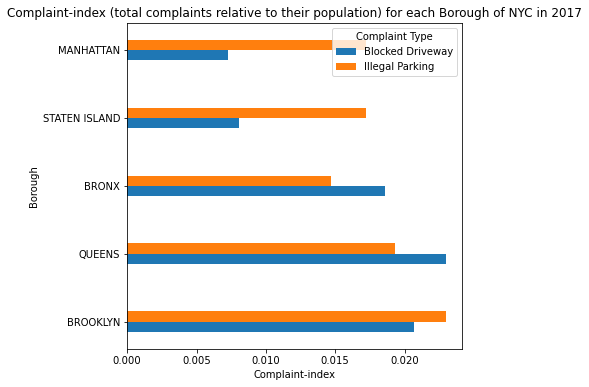

In [34]:
(df16_2017.reindex(index=df16_2017.mean(axis=1)
    .sort_values(ascending=False)
    .index).set_index('Borough').plot(kind='barh', figsize=(6,6), width=0.3,
            title='Complaint-index (total complaints relative to their population) for each Borough of NYC in 2017'))
plt.xlabel('Complaint-index')
plt.show()

<a class="anchor" id="comment4"></a> My prior was that the boroughs with the highest complaints about 'Blocked Driveway' also have the highest complaints about 'IIlegal Parking' and vice-versa, as they are both related. From the above plot, my assumption appears to be true, as Brooklyn and Queens have the highest complaints about both the types, wheras the other three boroughs have lesser complaints about the two complaint types. With regard to the variance of the complaint-indices, the level of illegal parking seems to be almost the same across all the boroughs in NYC but the variance for Blocked Driveway complaints is high.


# <a class="anchor" id="5.TS"></a> 6. Time Series / Exploratory Analysis

### 6.1. <a class="anchor" id="5.1.Q1"></a> Analysis-1: 
### Focus on complaints for “Loud Music / Party”. Create a graph of the rate of complaints by population over time for the city overall and each of the boroughs. Comment on any notable trends.

#### 6.1.1. Create a subset which has complaint descriptor variable - 'Loud music/Party'

In [35]:
Loud_music=df[df['Descriptor'].isin(['Loud Music/Party'])]
Loud_music['Incident Zip']= pd.to_numeric(Loud_music['Incident Zip'], errors='coerce') #convert string to numeric
Loud_music.shape
Loud_music.to_csv('Loud_music.csv', index=False) #saves the above file in csv format

#### 6.1.2. Calculate total number of complaints by descriptor by zipcode each month in 2021

In [36]:
#list with frequencies of the complaints
LM_total_complaints_freq_all = Loud_music[['Incident Zip','Year_month','Year','Month']].value_counts().tolist() 
#list with index of zipcodes
LM_total_complaints_all = Loud_music[['Incident Zip','Year_month','Year','Month']].value_counts().index.tolist() 

#convert lists to dataframes
LM_total_complaints_freq_all =pd.DataFrame(LM_total_complaints_freq_all, columns=['num_complaints'])
LM_total_complaints_all =pd.DataFrame(LM_total_complaints_all, columns=['Incident Zip','Year_month','Year','Month'])

#combine dataframes to form one
Loud_music2 = pd.concat([LM_total_complaints_all, LM_total_complaints_freq_all], axis=1)
print(Loud_music2.shape)
Loud_music2.head()

(25473, 5)


,Incident Zip,Year_month,Year,Month,num_complaints
0,10466.0,2020-08,2020,8,16766
1,10466.0,2021-07,2021,7,14477
2,10466.0,2020-09,2020,9,13779
3,10466.0,2020-07,2020,7,12049
4,10466.0,2021-09,2021,9,9195


#### 6.1.3. Merge Loud music dataset with population & Borough-Zip datasets

In [145]:
Loud_music3=Loud_music2.merge(pop, on='Incident Zip', how='left')
Loud_music4=Loud_music3.merge(Borough_Zip, on='Incident Zip', how='left') #Left join merge
Loud_music4=Loud_music4.dropna() 
Loud_music4.head()

,Incident Zip,Year_month,Year,Month,num_complaints,Population,Borough
0,10466.0,2020-08,2020,8,16766,67813.0,BRONX
1,10466.0,2021-07,2021,7,14477,67813.0,BRONX
2,10466.0,2020-09,2020,9,13779,67813.0,BRONX
3,10466.0,2020-07,2020,7,12049,67813.0,BRONX
4,10466.0,2021-09,2021,9,9195,67813.0,BRONX


#### 6.1.4. Create complaint-index variable & complaint-rate variable to form dataset by borough

In [136]:
#aggregating num_complaints and population by borough, month, year
Loud_music5=Loud_music4.groupby(['Borough','Year_month','Month','Year'])[['num_complaints','Population']].sum()

#complaint-index variable
Loud_music5['complaint_index']=Loud_music5['num_complaints']/Loud_music5['Population']

#adding lag of complaint_index variable by zipcode by month
Loud_music5['complaint_index_1']=Loud_music5.sort_values(['Borough','Year_month','Month','Year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable which is the growth rate in complaint index
#complaint-rate=(change in complaints index from last month to the current month)/(last month complaint index)
Loud_music5['complaint_rate']=(Loud_music5['complaint_index']-Loud_music5['complaint_index_1'])/Loud_music5['complaint_index_1']

Loud_music5 = Loud_music5.sort_values(['Borough','Year_month','Month','Year'],ascending=True) #sort by group
Loud_music5.reset_index(inplace=True) #converts labels to column
Loud_music5.head()

,Borough,Year_month,Month,Year,num_complaints,Population,complaint_index,complaint_index_1,complaint_rate
0,BRONX,2010-01,1,2010,2335,1828343.0,0.001277,NaN,NaN
1,BRONX,2010-02,2,2010,2200,1828343.0,0.001203,0.001277,-0.057816
2,BRONX,2010-03,3,2010,2165,1805421.0,0.001199,0.001203,-0.003415
3,BRONX,2010-04,4,2010,2614,1828343.0,0.001430,0.001199,0.192253
4,BRONX,2010-05,5,2010,2780,1828343.0,0.001521,0.001430,0.063504


#### <a class="anchor" id="5.1.5.Fig5"></a>6.1.5. Monthly plot of complaint-rates by each Borough between 2010 and 2021

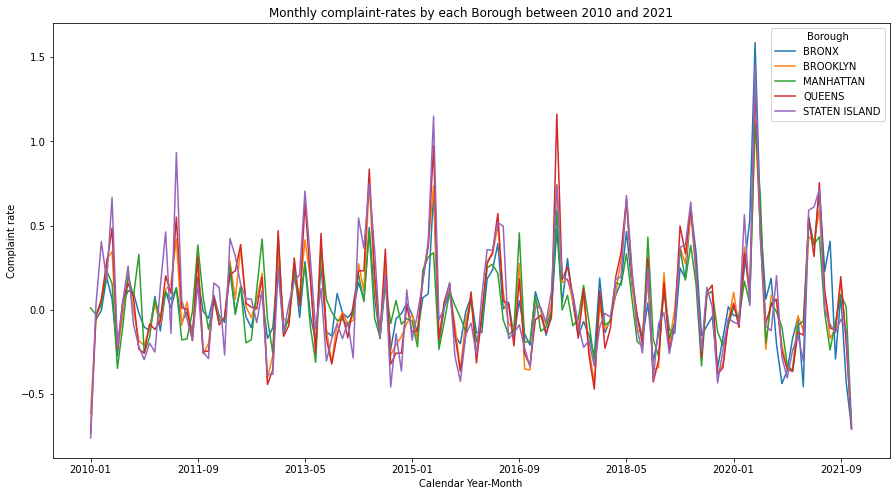

In [137]:
fig, ax = plt.subplots(figsize=(15,8))

for name, group in Loud_music5.groupby('Borough'):
    group.plot(x='Year_month', y='complaint_rate', ax=ax, label=name)

plt.xlabel('Calendar Year-Month')
plt.ylabel('Complaint rate')
plt.legend(title = "Borough")
plt.title("Monthly complaint-rates by each Borough between 2010 and 2021") 
plt.show()

#### 6.1.6. Create complaint-index variable & complaint-rate variable to form dataset for the entire city

In [138]:
#aggregating num_complaints and population by borough, month, year
Loud_music6=Loud_music4.groupby(['Year_month','Month','Year'])[['num_complaints','Population']].sum()

#complaint-index variable
Loud_music6['complaint_index']=Loud_music6['num_complaints']/Loud_music6['Population']

#adding lag of complaint_index variable by zipcode by month
Loud_music6['complaint_index_1']=Loud_music6.sort_values(['Year_month','Month','Year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable which is the growth rate in complaint index
#complaint-rate=(change in complaints index from last month to the current month)/(last month complaint index)
Loud_music6['complaint_rate']=(Loud_music6['complaint_index']-Loud_music6['complaint_index_1'])/Loud_music6['complaint_index_1']

Loud_music6 = Loud_music6.sort_values(['Year_month','Month','Year'],ascending=True) #sort by group
Loud_music6.reset_index(inplace=True) #converts labels to column

Loud_music6.head()

,Year_month,Month,Year,num_complaints,Population,complaint_index,complaint_index_1,complaint_rate
0,2010-01,1,2010,8669,9629926.0,0.000900,NaN,NaN
1,2010-02,2,2010,8306,9607727.0,0.000865,0.000900,-0.039660
2,2010-03,3,2010,8570,9563464.0,0.000896,0.000865,0.036560
3,2010-04,4,2010,10741,9628868.0,0.001115,0.000896,0.244812
4,2010-05,5,2010,13464,9641043.0,0.001397,0.001115,0.251932


#### <a class="anchor" id="5.1.7.Fig6"></a> 6.1.7. Monthly plot of complaint-rates for NYC between 2010 and 2021

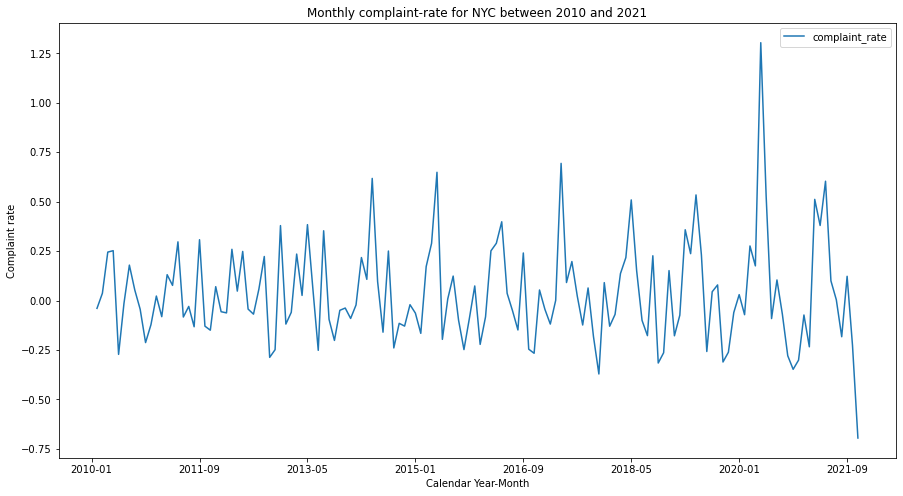

In [139]:
fig, ax = plt.subplots(figsize=(15,8))

Loud_music6.plot(x='Year_month', y='complaint_rate', ax=ax)

plt.xlabel('Calendar Year-Month')
plt.ylabel('Complaint rate')
plt.title("Monthly complaint-rate for NYC between 2010 and 2021") 
plt.show()

<a class="anchor" id="comment5"></a> From the above two plots, the series appear to be mean reverting with notable peaks in the month of May each year across all the boroughs and NYC as a whole. The complaint-rates have gone up leading to the month of May followed by a decline in the following months. This could be because people start to go outdoors or have more fun at the beginning of summers after long snowy/gloomy winters, and the complaints related to noise and illegal parking have gone up significantly in the month of May. I plot the same plot below between the years 2019 and 2021 to portray a much clearer picture.

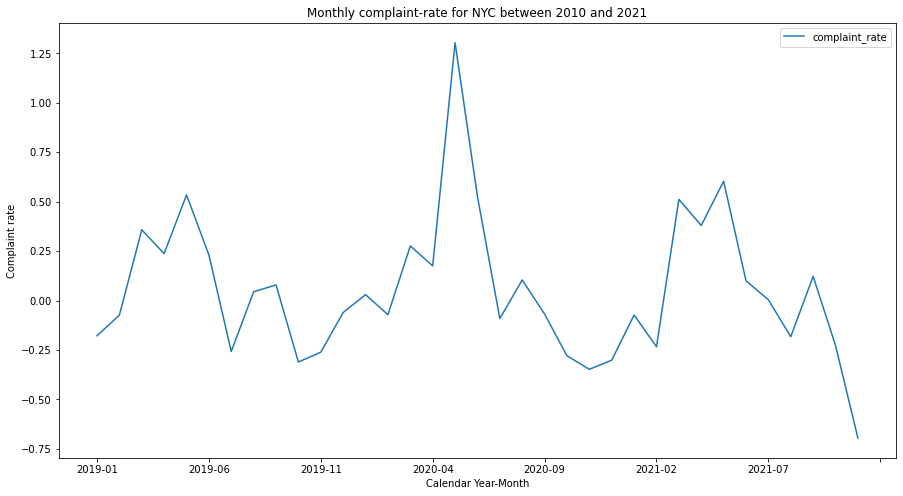

In [140]:
fig, ax = plt.subplots(figsize=(15,8))

Loud_music6[Loud_music6['Year'].isin([2019,2020,2021])].plot(x='Year_month', y='complaint_rate', ax=ax)

plt.xlabel('Calendar Year-Month')
plt.ylabel('Complaint rate')
plt.title("Monthly complaint-rate for NYC between 2010 and 2021") 
plt.show()

## <a class="anchor" id="5.2.Q2"></a> 6.2. Analysis-2: Which zip codes have shown the largest increase in these complaints over time? Develop some filter to make sure that the growth rates aren’t merely an artifact of low volumes.

#### 6.2.1. Create complaint-index variable & complaint-rate variable by zipcode by each month between 2010 and 2021

In [219]:
Loud_music8=Loud_music4.copy()

#complaint-index variable
Loud_music8['complaint_index']=Loud_music8['num_complaints']/Loud_music8['Population']

#adding lag of complaint_index variable by zipcode by month
Loud_music8['complaint_index_1']=Loud_music8.sort_values(['Incident Zip','Year_month','Month','Year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable which is the growth rate in complaint index
#complaint-rate=(change in complaints index from last month to the current month)/(last month complaint index)
Loud_music8['complaint_rate']=(Loud_music8['complaint_index']-Loud_music8['complaint_index_1'])/Loud_music8['complaint_index_1']

Loud_music8 = Loud_music8.sort_values(['Incident Zip','Year_month','Month','Year'],ascending=True) #sort by group
Loud_music8.reset_index(inplace=True) #converts labels to column
#Loud_music8=Loud_music8[Loud_music8['borough'].isin(Borough)]
Loud_music8.head()

,index,Incident Zip,Year_month,Year,Month,num_complaints,Population,Borough,complaint_index,complaint_index_1,complaint_rate
0,20257,10001.0,2010-01,2010,1,31,21102.0,MANHATTAN,0.001469,NaN,NaN
1,21308,10001.0,2010-02,2010,2,27,21102.0,MANHATTAN,0.001279,0.001469,-0.129032
2,19561,10001.0,2010-03,2010,3,34,21102.0,MANHATTAN,0.001611,0.001279,0.259259
3,16568,10001.0,2010-04,2010,4,49,21102.0,MANHATTAN,0.002322,0.001611,0.441176
4,19499,10001.0,2010-05,2010,5,35,21102.0,MANHATTAN,0.001659,0.002322,-0.285714


#### 6.2.1.2. Estimating mean of complaint-rates between 2010 and 2021 by zipcode

I estimate the means of complaint rates by zip code to check which zip codes have higher average growth rate

In [220]:
Loud_music9=Loud_music8.groupby(['Incident Zip','Population'])[['num_complaints','complaint_index','complaint_rate']].mean()
Loud_music9.reset_index(inplace=True) #converts labels to column
Loud_music9 = Loud_music9.sort_values(['complaint_rate'],ascending=False) #sort by complaint_rate
Loud_music9a = Loud_music9[:20] #20 largest zipcodes in terms of the increase in complaints over 6 months in 2021

#### <a class="anchor" id="5.2.2.Fig6"></a> 6.2.2. Scatter plot of Complaint rate vs Complaint Index at Zipcode level between 2010 and 2021 

I then plot the scatter plot to look for anomalies/outliers either in complaint rates or complaint index or population

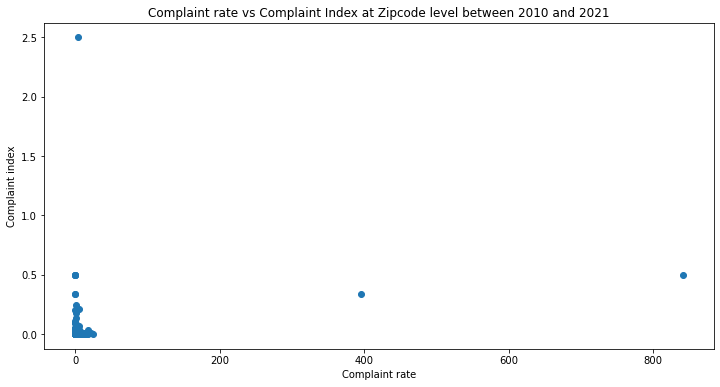

In [221]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Loud_music8['complaint_rate'],Loud_music8['complaint_index'])
ax.set_xlabel('Complaint rate')
ax.set_ylabel('Complaint index')
plt.title("Complaint rate vs Complaint Index at Zipcode level between 2010 and 2021")
plt.show()

<a class="anchor" id="comment6"></a> From the above scatter plot, there are a few outliers (too far from the cluster), wherein the complaint index (number of complaints to population ratio) is low but complaint rates (rate of change of complaint index) are high, and vice versa. Hence, I winsorize the extreme 10 percentile values of the variables - population, number of complaints, and complaint index variables below to eliminate these outliers (meaning, replace observations less than 10 and greater than 90 percentile values with 10 and 90 values respectively).

#### 6.2.2.1. Print 10 and 90 percentile values

In [222]:
print(Loud_music8['Population'].quantile(0.10))
print(Loud_music8['Population'].quantile(0.90))
print(Loud_music8['num_complaints'].quantile(0.10))
print(Loud_music8['num_complaints'].quantile(0.90))

17823.0
87757.0
9.0
252.0


#### 6.2.2.2. Winsorize the variables - complaint index and complaint rate

In [223]:
Loud_music8['Population'] = np.where(Loud_music8['Population'] <17823.0, 17823.0,Loud_music8['Population'])
Loud_music8['Population'] = np.where(Loud_music8['Population'] >87757.0, 87757.0,Loud_music8['Population'])
Loud_music8['num_complaints'] = np.where(Loud_music8['num_complaints'] <9.0, 9.0,Loud_music8['num_complaints'])
Loud_music8['num_complaints'] = np.where(Loud_music8['num_complaints'] >252.0, 252.0,Loud_music8['num_complaints'])

#### 6.2.3. Post winsorization, create complaint-index variable by zipcode by each month between 2010 and 2021

In [224]:
#complaint-index variable
Loud_music8['complaint_index']=Loud_music8['num_complaints']/Loud_music8['Population']

#### 6.2.3.1. Winsorize complaint index variable

In [225]:
print(Loud_music8['complaint_index'].quantile(0.10))
print(Loud_music8['complaint_index'].quantile(0.90))

0.00043577981651376146
0.003871388199923732


In [231]:
Loud_music8['complaint_index'] = np.where(Loud_music8['complaint_index'] <0.00044, 0.00044,Loud_music8['complaint_index'])
Loud_music8['complaint_index'] = np.where(Loud_music8['complaint_index'] >0.0039, 0.0039,Loud_music8['complaint_index']
                                         
                                         
#adding lag of complaint_index variable by zipcode by month
Loud_music8['complaint_index_1']=Loud_music8.sort_values(['Incident Zip','Year_month','Month','Year'],ascending=True)['complaint_index'].shift(1)

#add complaint-rate variable which is the growth rate in complaint index
#complaint-rate=(change in complaints index from last month to the current month)/(last month complaint index)
Loud_music8['complaint_rate']=(Loud_music8['complaint_index']-Loud_music8['complaint_index_1'])/Loud_music8['complaint_index_1']

Loud_music8 = Loud_music8.sort_values(['Incident Zip','Year_month','Month','Year'],ascending=True) #sort by group
#Loud_music8.reset_index(inplace=True) #converts labels to column
#Loud_music8=Loud_music8[Loud_music8['borough'].isin(Borough)]
Loud_music8.head()

,index,Incident Zip,Year_month,Year,Month,num_complaints,Population,Borough,complaint_index,complaint_index_1,complaint_rate
0,20257,10001.0,2010-01,2010,1,31.0,21102.0,MANHATTAN,0.001469,NaN,NaN
1,21308,10001.0,2010-02,2010,2,27.0,21102.0,MANHATTAN,0.001279,0.001469,-0.129032
2,19561,10001.0,2010-03,2010,3,34.0,21102.0,MANHATTAN,0.001611,0.001279,0.259259
3,16568,10001.0,2010-04,2010,4,49.0,21102.0,MANHATTAN,0.002322,0.001611,0.441176
4,19499,10001.0,2010-05,2010,5,35.0,21102.0,MANHATTAN,0.001659,0.002322,-0.285714


#### 6.2.3.2. Scatter plot of Complaint rate vs Complaint Index at Zipcode level between 2010 and 2021 -- after winsorization

This is to make sure that there are no outliers

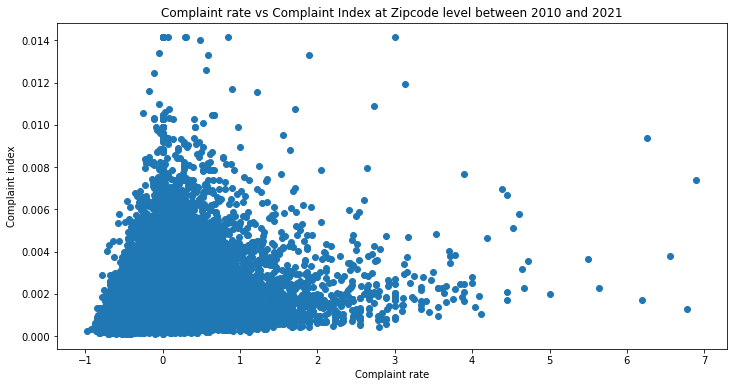

In [232]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Loud_music8['complaint_rate'],Loud_music8['complaint_index'])
ax.set_xlabel('Complaint rate')
ax.set_ylabel('Complaint index')
plt.title("Complaint rate vs Complaint Index at Zipcode level between 2010 and 2021")
plt.show()

<a class="anchor" id="comment7"></a> From the above plot, upon eliminating the outliers, it seems like higher average complaint index values have higher average complaint rates and vice versa. So this is an evidence that growth rates are not just a manifestation of low volumes. I also provide a comparison of average complaint indices and average growth rates for the top 20 zip codes below to reaffirm my conclusion.

In [233]:
Loud_music9=Loud_music8.groupby(['Incident Zip','Population'])[['num_complaints','complaint_index','complaint_rate']].mean()
Loud_music9.reset_index(inplace=True) #converts labels to column
Loud_music9 = Loud_music9.sort_values(['complaint_rate'],ascending=False) #sort by complaint_rate
Loud_music9b = Loud_music9[:20] #20 largest zipcodes in terms of the increase in complaints over 6 months in 2021

#### <a class="anchor" id="5.2.3.Tab1"></a> 6.2.3. Zip codes with highest average complaint growth rates before and after winsorization

In [234]:
#code to display two pandas dataframes side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

display_side_by_side(Loud_music9a,Loud_music9b,titles=['Before winsorization','After winsorization'])

,Incident Zip,Population,num_complaints,complaint_index,complaint_rate
45,10165.0,2.0,1.000000,0.500000,841.500000
41,10103.0,3.0,1.000000,0.333333,131.590909
92,11096.0,8344.0,1.000000,0.000120,3.887584
188,11697.0,4079.0,5.000000,0.001226,1.074376
46,10170.0,2.0,2.000000,1.000000,1.000000
88,11001.0,26883.0,3.545455,0.000132,0.872583
48,10280.0,7853.0,3.300971,0.000420,0.665743
5,10006.0,3011.0,6.544118,0.002173,0.663717
142,11360.0,18884.0,5.954545,0.000315,0.627924
3,10004.0,3089.0,6.014815,0.001947,0.596319


<a class="anchor" id="comment8"></a> From the above datasets, the Incident Zip codes with the highest average complaint rates have higher complaint indices, before and after the winsorization of number of complaints, population, and complaint index values. 